In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import math
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random
#See Styles
#print(plt.style.available)
        
class monte_carlo:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    def get_asset(self, symbol):
        #Dates
        start = self.start 
        end = self.end 
        
        prices = web.DataReader(symbol, 'yahoo',start, end)['Close']
        returns = prices.pct_change()
        
        self.returns = returns
        self.prices = prices
    def brownian_motion(self, num_simulations, predicted_days):
        returns = self.returns
        prices = self.prices
 
        last_price = prices[-1]
 
        #Note we are assuming drift here
        simulation_df = pd.DataFrame()
        
        #Create Each Simulation as a Column in df
        for x in range(num_simulations):
            
            #Inputs
            count = 0
            avg_daily_ret = returns.mean()
            variance = returns.var()
            
            daily_vol = returns.std()
            daily_drift = avg_daily_ret - (variance/2)
            drift = daily_drift - 0.5 * daily_vol ** 2
            
            #Append Start Value    
            prices = []
            
            shock = drift + daily_vol * np.random.normal()
            last_price * math.exp(shock)
            prices.append(last_price)
            
            for i in range(predicted_days):
                if count == 2531:
                    break
                shock = drift + daily_vol * np.random.normal()
                price = prices[count] * math.exp(shock)
                prices.append(price)
                
        
                count += 1
            simulation_df[x] = prices
            self.simulation_df = simulation_df
            global market
            market = self.simulation_df
            self.predicted_days = predicted_days
    def line_graph(self):
        prices = self.prices
        predicted_days = self.predicted_days
        simulation_df = self.simulation_df
        
        last_price = prices[-1]
        fig = plt.figure()
        style.use('bmh')
        
        title = "Monte Carlo Simulation: " + str(predicted_days) + " Days"
        plt.plot(simulation_df)
        fig.suptitle(title,fontsize=18, fontweight='bold')
        plt.xlabel('Day')
        plt.ylabel('Price ($USD)')
        plt.grid(True,color='grey')
        plt.axhline(y=last_price, color='r', linestyle='-')
        plt.show()

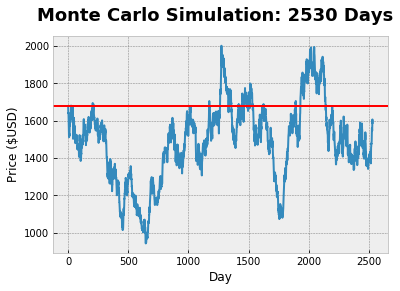

In [2]:
monte = monte_carlo(datetime.datetime(2000, 1, 3), datetime.datetime(2020, 2, 21))
monte.get_asset('^RUT')
monte.brownian_motion(1, 2530)
monte.line_graph()

In [3]:
print(market)

                0
0     1678.609985
1     1640.067485
2     1642.403293
3     1633.642059
4     1603.067641
...           ...
2526  1555.499133
2527  1546.559524
2528  1575.143696
2529  1606.783872
2530  1588.414509

[2531 rows x 1 columns]


In [4]:
sectors = ["Communication Services", "Consumer Discretionary", "Consumer Staples", "Energy", "Financials", "Health Care", "Industrials", "Information Technology", "Materials", "Real Estate", "Utilities"]
class company:
    def __init__(self):
        self.owner = "None"
        self.name = "NA"
        self.sector = sectors[random.randrange(0, 11)]
        self.revenue = random.randrange(20000, 1000000, 10000)
        self.accept_deal_prob = 0.1

In [5]:
companies = list()
for i in range(100):
    companies.append(company())

In [6]:
print(companies[99].revenue)

590000


In [7]:
class deals:
    def __init__(self):
        self.monthlyOffers = 0
    def addOffers(self, n):
        self.monthlyOffers = self.monthlyOffers + n
    def __str__(self):
        return str(self.monthlyOffers)
class player:
    def __init__(self, playr):
        self.name = playr
        self.cash = 100000
        self.interestRate = 0
        self.loanAmountDue = 0
        self.bankruptCount = 0
        self.personalExpenses = 3000
        self.businessExpenses = 2000
        self.numOffers = deals()
        self.dealExpenses = self.numOffers.monthlyOffers * 2.83
    def buildData(self, x):
        self.numOffers.addOffers(x)

In [8]:
player1 = player('jacky')
print(player1.numOffers)
player1.buildData(5)
print(player1.numOffers)

0
5
